# 伊辛模型

In [2]:
using Plots

In [3]:
pyplot()

Plots.PyPlotBackend()

In [4]:
function calEnergy(config,parMat)
    #Periodical Boundary Condition
    Nx,Ny = parMat["Nx"],parMat["Ny"]
    J = parMat["J"]
    energy = 0.0
    for i in 1:Nx, j in 1:Ny
        energy += J*config[i,j]*(config[mod(i-1+Nx-1,Nx)+1,j] + config[mod(i-1+Nx+1,Nx)+1,j] + config[i,mod(j-1+Ny-1,Ny)+1]+config[i,mod(j-1+Ny+1,Ny)+1])
    end
    energy
end

calEnergy (generic function with 1 method)

In [5]:
function initiateState(size)
    return rand((-1,1),size["Nx"],size["Ny"])
end

initiateState (generic function with 1 method)

In [6]:
function calMagnet(config)
    return sum(config)
end

calMagnet (generic function with 1 method)

In [7]:
function flipSpin!(config,parMat;times=1)
    Nx,Ny = parMat["Nx"],parMat["Ny"]
    J = parMat["J"]
    T = parMat["T"]
    for t = 1:times
        i,j = rand((1:Nx)),rand((1:Ny))
        δE= -2*J*config[i,j]*(config[mod(i-1+Nx-1,Nx)+1,j] + config[mod(i-1+Nx+1,Nx)+1,j] + config[i,mod(j-1+Ny-1,Ny)+1]+config[i,mod(j-1+Ny+1,Ny)+1]) 
        randVar = rand()
        if δE<0
            config[i,j]= -config[i,j]
        elseif randVar < exp(-δE/T)
            config[i,j]= -config[i,j]
        end
    end
end

flipSpin! (generic function with 1 method)

In [8]:
parMat = Dict("Nx"=>100 ,"Ny"=>100, "J" =>-1,"T"=>10.0)

Dict{String, Real} with 4 entries:
  "J"  => -1
  "T"  => 10.0
  "Nx" => 100
  "Ny" => 100

In [9]:
parMat = Dict("Nx"=>200 ,"Ny"=>200, "J" =>-1,"T"=>0.1)

Dict{String, Real} with 4 entries:
  "J"  => -1
  "T"  => 0.1
  "Nx" => 200
  "Ny" => 200

In [10]:
config1 = initiateState(parMat);

In [11]:
times = 1000*parMat["Nx"]*parMat["Ny"]
flipSpin!(config1,parMat,times=times)

In [12]:
calEnergy(config1,parMat)/(parMat["Nx"]*parMat["Ny"])

-3.9416

In [13]:
calMagnet(config1)

17994

In [21]:
#pcolor(config1,cmap="PuBu_r")
#colorbar()
#heatmap(config1)

数据可视化

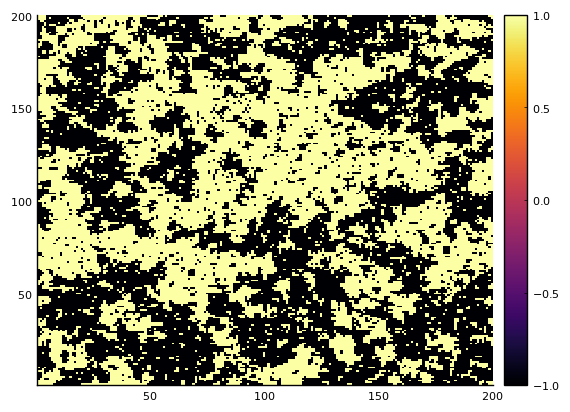

┌ Info: Saved animation to 
│   fn = /home/richard/Documents/Notebooks/ExamplesFolder/tmp.gif
└ @ Plots /home/richard/.julia/packages/Plots/5kcBO/src/animation.jl:114


Plots.AnimatedGif("/home/richard/Documents/Notebooks/ExamplesFolder/tmp.gif")
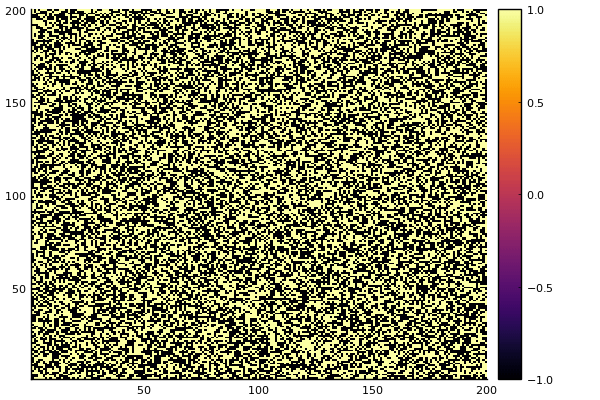

In [23]:
parMat["T"] = 2.4
config1 = initiateState(parMat)
@gif for i = 1:500
    heatmap(config1)
    times = 1*parMat["Nx"]*parMat["Ny"]
    flipSpin!(config1,parMat,times=times)
end

统计结果